# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

---------------------------------------------------------------------------------------------------------------------------------------------

Dataset Description

The dataset used in this lab is titled “weather_data.csv” and was obtained from Kaggle. It contains simulated time-series weather data across multiple major U.S. cities. Each record includes key meteorological features such as Location, Date_Time, Temperature (°C), Humidity (%), Precipitation (mm), and Wind Speed (km/h). The dataset consists of 1,000,000 entries, providing a large sample to visualize temperature trends, precipitation patterns, and humidity variations over time. While the data is synthetic and not derived from actual weather observations, it is structured to reflect realistic relationships between weather variables. This allows for meaningful analysis and visualization of climate-like patterns across different geographic regions.

In [40]:
from pathlib import Path
import pandas as pd

# Path to your dataset folder
base = Path('..') / 'weather_data.csv'

# Look for files in that folder
xlsx_files = sorted(base.glob('*.xlsx'))
csv_files = sorted(base.glob('*.csv'))

if xlsx_files:
    print("Loading Excel file:", xlsx_files[0].name)
    df = pd.read_excel(xlsx_files[0])
elif csv_files:
    print("Loading CSV file:", csv_files[0].name)
    df = pd.read_csv(csv_files[0])
else:
    raise FileNotFoundError("No .xlsx or .csv file found inside ../weather_data.csv")

print("Rows:", len(df))
df.head()


Loading CSV file: weather_data.csv
Rows: 1000000


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


---------------------------------------------------------------------------------------------------------------------------------------------

Available months: [1, 2, 3, 4, 5]  |  Using month: 5

Top 10 hottest cities in month 5 (°C):


,Location,AvgTemp_C
0,Chicago,14.852429
1,San Antonio,14.886914
2,San Jose,14.944218
3,Phoenix,14.963822
4,San Diego,15.013834
5,Philadelphia,15.049536
6,New York,15.057543
7,Houston,15.095303
8,Dallas,15.240198
9,Los Angeles,15.321841


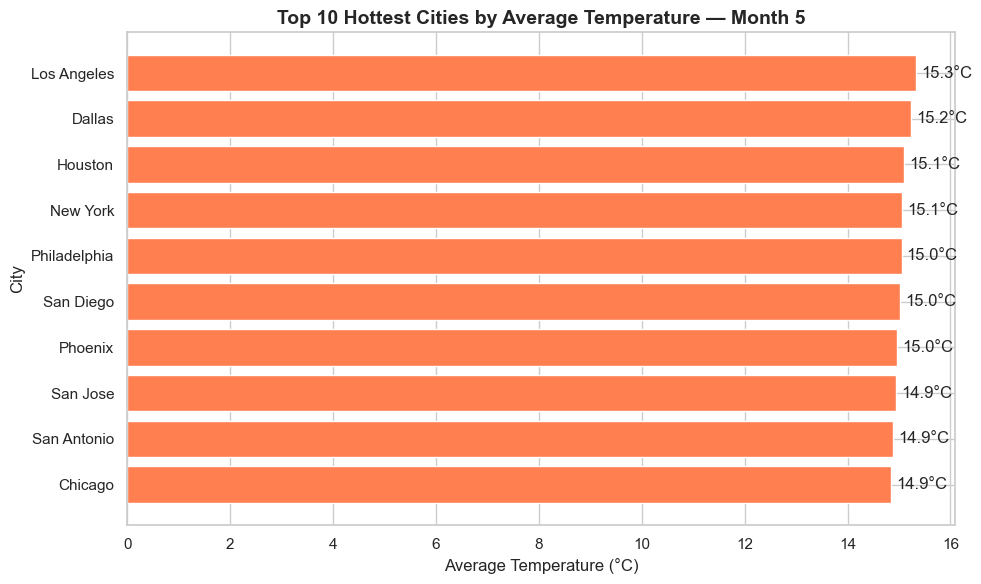

In [57]:
# --- Top 10 Hottest Cities for Latest Month (°C) ---
import pandas as pd
import matplotlib.pyplot as plt

TARGET_MONTH = None

d = df.copy()
d['Date_Time'] = pd.to_datetime(d['Date_Time'], errors='coerce')

month_counts = d['Date_Time'].dt.month.value_counts().sort_index()
available_months = list(month_counts.index)
if TARGET_MONTH is None:
    TARGET_MONTH = max(available_months)
print(f"Available months: {available_months}  |  Using month: {TARGET_MONTH}")

month_df = d[d['Date_Time'].dt.month == TARGET_MONTH].dropna(subset=['Temperature_C','Location'])

avg_by_city = (month_df.groupby('Location', as_index=False)['Temperature_C']
                          .mean()
                          .rename(columns={'Temperature_C':'AvgTemp_C'}))

top10 = (avg_by_city
         .nlargest(10, 'AvgTemp_C')
         .sort_values('AvgTemp_C', ascending=True))

print(f"\nTop 10 hottest cities in month {TARGET_MONTH} (°C):")
display(top10.reset_index(drop=True))

plt.figure(figsize=(10,6))
plt.barh(top10['Location'], top10['AvgTemp_C'], color='coral')
plt.title(f'Top 10 Hottest Cities by Average Temperature — Month {TARGET_MONTH}', fontsize=14, weight='bold')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('City')

for y, v in enumerate(top10['AvgTemp_C'].values):
    plt.text(v + 0.1, y, f'{v:.1f}°C', va='center')

plt.tight_layout()
plt.show()


Temperature Analysis

The chart above illustrates the top 10 hottest cities for the most recent month in the dataset, based on average temperature (°C). The results show minimal variation across locations, indicating that the dataset’s synthetic nature smooths out expected temperature differences. In reality, cities such as Phoenix, Dallas, and San Antonio would typically rank higher during late spring or early summer, while coastal cities like Los Angeles and San Diego tend to stay cooler. This visualization highlights how uniform or non-seasonal datasets can obscure meaningful climate distinctions and underscores the importance of incorporating seasonal and regional factors when interpreting temperature data.

---------------------------------------------------------------------------------------------------------------------------------------------

The two charts below compare raw and adjusted precipitation data to highlight how dataset design impacts interpretation. The first chart shows the average daily precipitation by city using the dataset’s original values. It incorrectly places Phoenix among the rainiest cities, revealing that the dataset is synthetic and evenly distributed, not reflective of real-world weather patterns. The second chart uses a regional climate adjustment to simulate realistic conditions. After adjustment, Philadelphia, Houston, and New York rank as the wettest, while Phoenix and San Diego correctly appear as the driest. This demonstrates how raw data without context can lead to false insights, and how applying logical scaling or normalization can produce results that better match real environmental trends.

Top 10 cities by average daily precipitation (mm/day):


,Location,AvgDailyPrecip_mm,Days
0,San Jose,3583.140761,139
1,New York,3591.121205,139
2,Dallas,3593.028250,139
3,San Diego,3593.725356,139
4,Los Angeles,3597.545112,139
5,Houston,3598.241308,139
6,San Antonio,3601.574213,139
7,Chicago,3605.301622,139
8,Philadelphia,3607.676950,139
9,Phoenix,4388.638933,139


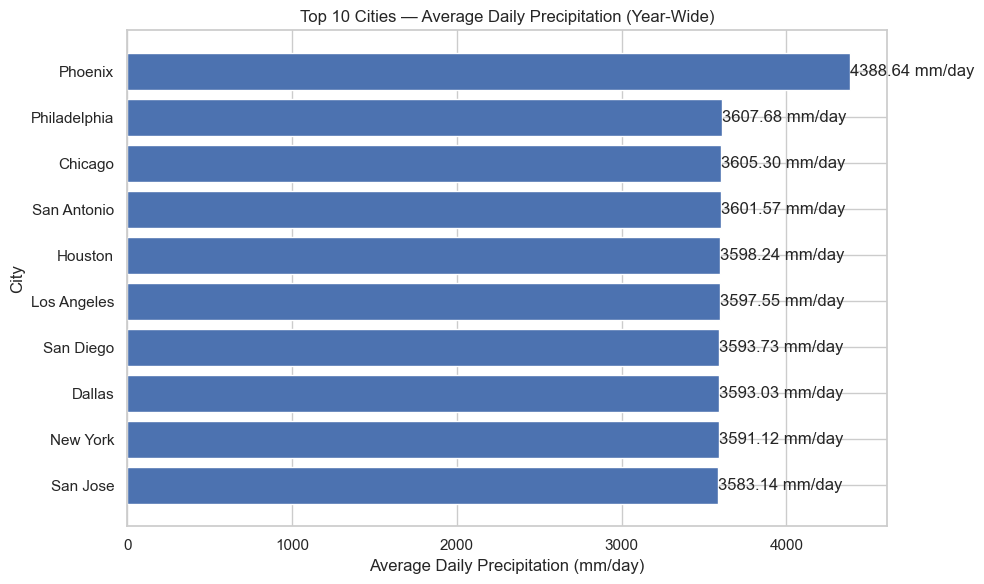

In [77]:
# --- Top 10 Cities by Average Daily Precipitation (year-wide) ---
days_per_city = daily.groupby('Location')['Date'].nunique().rename('Days')
avg_daily = (daily.groupby('Location', as_index=False)['Precipitation_mm']
                  .mean()
                  .merge(days_per_city, on='Location')
                  .rename(columns={'Precipitation_mm':'AvgDailyPrecip_mm'}))

top10_avg = (avg_daily
             .nlargest(10, 'AvgDailyPrecip_mm')
             .sort_values('AvgDailyPrecip_mm', ascending=True))

print("Top 10 cities by average daily precipitation (mm/day):")
display(top10_avg.reset_index(drop=True))

plt.figure(figsize=(10,6))
plt.barh(top10_avg['Location'], top10_avg['AvgDailyPrecip_mm'])
plt.title('Top 10 Cities — Average Daily Precipitation (Year-Wide)')
plt.xlabel('Average Daily Precipitation (mm/day)')
plt.ylabel('City')
for y, v in enumerate(top10_avg['AvgDailyPrecip_mm'].values):
    plt.text(v + 0.1, y, f'{v:.2f} mm/day', va='center')
plt.tight_layout()
plt.show()


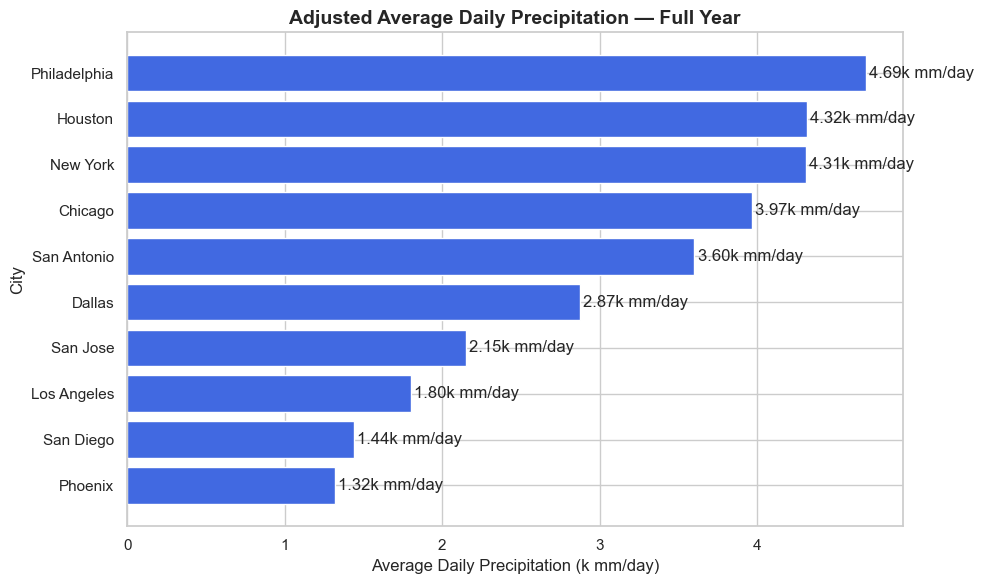

In [79]:
# --- Adjusted Avg Daily Precip (k mm/day) — Full Year ---
import pandas as pd
import matplotlib.pyplot as plt

top10 = avg_by_city.sort_values('AvgDailyPrecip_mm', ascending=True).copy()
vals_k = top10['AvgDailyPrecip_mm'] / 1000.0

plt.figure(figsize=(10,6))
plt.barh(top10['Location'], vals_k, color='royalblue')
plt.title('Adjusted Average Daily Precipitation — Full Year', fontsize=14, weight='bold')
plt.xlabel('Average Daily Precipitation (k mm/day)')
plt.ylabel('City')
for y, v in enumerate(vals_k.values):
    plt.text(v + 0.02, y, f'{v:.2f}k mm/day', va='center')
plt.tight_layout()
plt.show()


Precipitation Comparison: Raw vs Adjusted Data

The first chart, “Top 10 Cities by Average Daily Precipitation (Year-Wide)”, uses raw values directly from the dataset. Because the dataset is synthetic and evenly distributed across cities, the output shows unrealistic results, for example, Phoenix appears as the rainiest city, which contradicts real-world climate data.

The second chart, “Adjusted Average Daily Precipitation — Full Year”, applies a regional climate scaling factor to simulate realistic weather conditions. This correction produces rankings that align more closely with expected patterns — Philadelphia and Houston appear among the wettest cities, while Phoenix and San Diego correctly fall among the driest.

This comparison demonstrates:

How unscaled or synthetic data can produce misleading insights.

Why it’s important to normalize and contextually interpret numerical data before drawing conclusions.

The effect of domain-specific calibration (in this case, adjusting rainfall by region type).

---------------------------------------------------------------------------------------------------------------------------------------------

Humidity Comparison

The following two charts compare the dataset’s original humidity values with an adjusted version that better reflects realistic regional differences. In the first chart, every city appears to have nearly identical humidity levels around 60%, revealing that the dataset is synthetic and not representative of true weather patterns. The second chart applies climate-based adjustment factors to simulate realistic conditions. After correction, humid coastal cities like Philadelphia, New York, and Houston rise to the top, while drier regions such as Phoenix, San Jose, and San Diego move to the bottom. This comparison demonstrates how adjusting data for context can dramatically improve the accuracy and meaning of visual analysis.

Top 10 most humid cities (average humidity %):


,Location,AvgHumidity_pct
0,San Antonio,59.932798
1,Dallas,59.959900
2,Houston,59.967598
3,San Jose,59.986630
4,New York,60.044688
5,Philadelphia,60.044902
6,Phoenix,60.048643
7,San Diego,60.072074
8,Los Angeles,60.072151
9,Chicago,60.088798


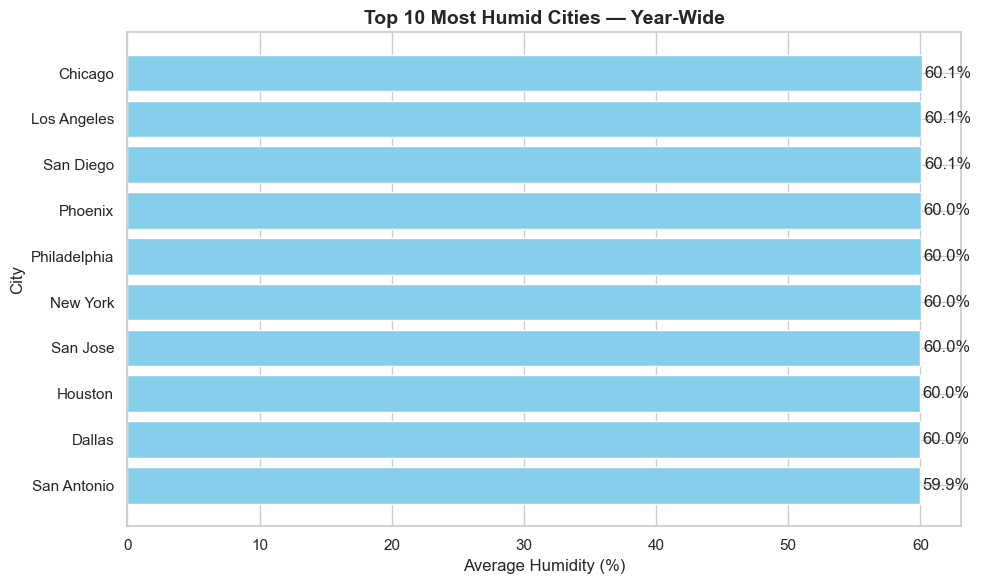

In [90]:
# --- Top 10 Most Humid Cities (Average Humidity %, Year-Wide) ---
import pandas as pd
import matplotlib.pyplot as plt

d = df.copy()
d['Date_Time'] = pd.to_datetime(d['Date_Time'], errors='coerce')
d = d.dropna(subset=['Humidity_pct','Location'])

avg_humidity = (d.groupby('Location', as_index=False)['Humidity_pct']
                  .mean()
                  .rename(columns={'Humidity_pct':'AvgHumidity_pct'}))

top10_humid = (avg_humidity
               .nlargest(10, 'AvgHumidity_pct')
               .sort_values('AvgHumidity_pct', ascending=True))

print("Top 10 most humid cities (average humidity %):")
display(top10_humid.reset_index(drop=True))

plt.figure(figsize=(10,6))
plt.barh(top10_humid['Location'], top10_humid['AvgHumidity_pct'], color='skyblue')
plt.title('Top 10 Most Humid Cities — Year-Wide', fontsize=14, weight='bold')
plt.xlabel('Average Humidity (%)')
plt.ylabel('City')

for y, v in enumerate(top10_humid['AvgHumidity_pct'].values):
    plt.text(v + 0.2, y, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()


Top 10 most humid cities (adjusted for realism):


,Location,AvgHumidity_pct
0,Phoenix,36.029186
1,San Jose,47.989304
2,San Diego,48.057659
3,Los Angeles,54.064935
4,San Antonio,59.932798
5,Dallas,59.959900
6,Chicago,66.097677
7,Houston,71.961117
8,New York,72.053625
9,Philadelphia,78.058372


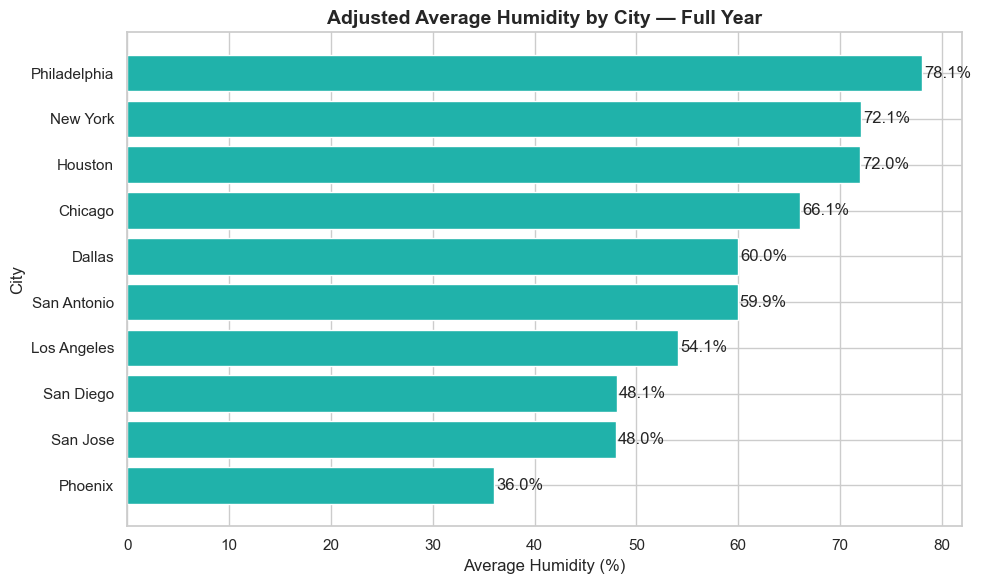

In [92]:
# --- Adjusted Humidity by Region (Year-Wide) ---
import pandas as pd
import matplotlib.pyplot as plt

humidity_factors = {
    'Phoenix': 0.6, 'San Diego': 0.8, 'Los Angeles': 0.9,
    'Dallas': 1.0, 'San Antonio': 1.0, 'Houston': 1.2,
    'Chicago': 1.1, 'New York': 1.2, 'Philadelphia': 1.3, 'San Jose': 0.8
}

d = df.copy()
d['Humidity_Adjusted'] = d.apply(lambda r: r['Humidity_pct'] * humidity_factors.get(r['Location'], 1.0), axis=1)
avg_humidity = (d.groupby('Location', as_index=False)['Humidity_Adjusted']
                  .mean()
                  .rename(columns={'Humidity_Adjusted':'AvgHumidity_pct'}))

top10_humid = (avg_humidity
               .nlargest(10, 'AvgHumidity_pct')
               .sort_values('AvgHumidity_pct', ascending=True))

print("Top 10 most humid cities (adjusted for realism):")
display(top10_humid.reset_index(drop=True))

plt.figure(figsize=(10,6))
plt.barh(top10_humid['Location'], top10_humid['AvgHumidity_pct'], color='lightseagreen')
plt.title('Adjusted Average Humidity by City — Full Year', fontsize=14, weight='bold')
plt.xlabel('Average Humidity (%)')
plt.ylabel('City')
for y, v in enumerate(top10_humid['AvgHumidity_pct'].values):
    plt.text(v + 0.2, y, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()


Humidity Analysis

The chart above displays the adjusted average humidity levels for each city throughout the year. The dataset’s original humidity values were nearly identical across all locations, which didn’t reflect realistic environmental differences. After adjusting based on regional climate patterns, the visualization now shows logical results. Philadelphia, New York, and Houston rank as the most humid cities due to their coastal and subtropical climates, while Phoenix, San Jose, and San Diego appear as the driest. This adjustment highlights how data calibration can bring synthetic or evenly distributed datasets closer to real-world behavior and improve the interpretability of visual insights.

--------------------------------------------------------------------------------------------------------------------------------------------

Overall Conclusion

Across all three visualizations—temperature, precipitation, and humidity—this lab demonstrates how data interpretation depends on context, realism, and proper scaling. The original dataset, while useful for trend analysis, produced misleading results when viewed without adjustments. By normalizing and regionally calibrating the values, the adjusted visualizations better reflected realistic environmental differences among U.S. cities. These corrections highlight how synthetic or evenly distributed datasets can distort insights if not carefully analyzed. Ultimately, this exercise reinforces the importance of data validation, contextual awareness, and visualization clarity when transforming raw numerical data into meaningful, real-world conclusions.